# **COMP 2211 Exploring Artificial Intelligence** #
## Lab 2: Naive Bayes Classifier ##


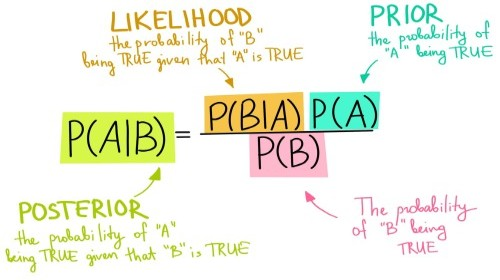

The Naive Bayes Classifier is a simple probabilistic classifier based on applying Bayes' theorem. It is often used in various tasks such as spam filtering, sentiment analysis, and recommendation systems.

In this lab, you will implement a Naive Bayes Classifier to predict whether a student will pass or fail a course based on the student's data such as study hours, sleeping hours, and other features.

## 0. Upload data and Import Libraries
Download and upload a copy of the dataset (X_train, y_train, X_test, y_test) to Colab.

You can do this by simply dragging and dropping the files to the left sidebar.

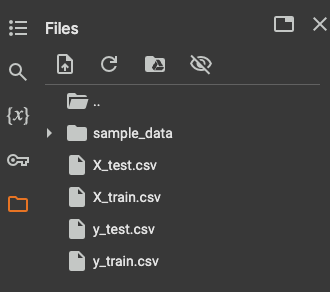

If you have successfully uploaded the dataset, you should see X_test.csv, X_train.csv, y_test.csv, y_train.csv in the output from the code below.

In [ ]:
%ls

For this lab activity, we will use the **Pandas** and **Numpy** library. You can import these by running the code below:

In [2]:
import pandas as pd
import numpy as np

## 1. Loading the dataset

The dataset contains information about students' study habits and other factors influencing academic performance. We will use this data to predict whether a student will pass or fail a course.

| Feature                    | Description                          | Values                 |
|----------------------------|--------------------------------------|------------------------|
| Hours Studied              | Total hours spent studying           | 0 - 0 ~ 10 hrs, 1 - 10 ~ 20 hrs, 2 - 20 ~ 30 hrs, 3 - 30 ~ hrs|
| Sleep Hours                | Average sleep duration per day       | 0 - 4 ~ 5 hrs, 1 - 6 ~ 7 hrs, 2 - 8 ~ 9 hrs, 3 - 10 ~ hrs   |
| Interest Level             | Student's interest in the subject    | 0 - Low, 1 - Medium, 2 - High |
| Attendance                 | Frequency of class attendance        | 0 - Low, 1 - Medium, 2 - High |
| Social Media Usage         | Time spent on social media           | 0 - Low, 1 - Medium, 2 - High |
| Extracurricular Activities | Participation in extracurriculars    | 0 - No, 1 - Yes |
| Course Result              | Time spent on social media           | 0 - Fail, 1 - Pass |

Relevant information on the dataset can be retrieved by running the code below:

In [ ]:
if __name__ == '__main__':
  # Load data
  X_train = pd.read_csv('X_train.csv')
  X_test = pd.read_csv('X_test.csv')
  y_train = pd.read_csv('y_train.csv')
  y_test = pd.read_csv('y_test.csv')

  print(f"X_train columns: {[_ for _ in X_train.columns]}")
  print(f"y_train columns: {[_ for _ in y_train.columns]}")
  print(f"X_train Rows: {X_train.shape[0]} Columns: {X_train.shape[1]}")
  print(f"X_test Rows: {X_test.shape[0]} Columns: {X_test.shape[1]}")
  print(f"y_train Rows: {y_train.shape[0]} Columns: {y_train.shape[1]}")
  print(f"y_test Rows: {y_test.shape[0]} Columns: {y_test.shape[1]}")

  X_train = np.array(X_train, dtype=np.int16)
  X_test = np.array(X_test, dtype=np.int16)
  y_train = np.array(y_train, dtype=np.int16).flatten()
  y_test = np.array(y_test, dtype=np.int16).flatten()


## 2. Build a Naive Bayes Classifier

In this section, you will implement a Naive Bayes Classifier from scratch. While in class, we explored Scikit-learn’s implementation, this task requires you to build the classifier from scratch.

In [ ]:
# Example of using CategoricalNB from sklearn
if __name__ == '__main__':
    from sklearn.naive_bayes import CategoricalNB

    classifier = CategoricalNB(alpha=1.0e-10)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    result = "Pass" if y_pred[0] == 1 else "Fail"
    print(f"Student with Hours Studied {X_test[0][0]}, \n" 
         f"Sleep Hours {X_test[0][1]}, \n"
         f"Interest Level {X_test[0][2]}, \n"
         f"Attendance {X_test[0][3]}, \n"
         f"Social Media Usage {X_test[0][4]}, \n"
         f"and Extracurricular Activities {X_test[0][5]} is predicted to have a grade of {result}")

### What do we need to create a Naive Bayes Classifier?

The fundamental equation behind Naive Bayes classification is:
$$ P(Belief | Evidence) = \frac{P(Evidence | Belief) \cdot P(Belief)}{P(Evidence)} $$

To implement a Naive Bayes classifier, we need to:
- Task 1. **Compute Prior Probabilities P(Belief)**: Compute the probability of each class occurring in the dataset.
- Task 2. **Compute Likelihoods Probabilities P(Evidence | Belief)**: Compute the probability of each feature given the class label.
- Task 3. **Compute Posterior Probabilities P(Belief | Evidence)**: Use Bayes' Theorem to compute the probability of each class given an input sample.


### Task 1: **Compute Prior Probabilities (=P(Belief))**
Implement compute_priors() function that computes the prior probabilities of each class occurring in the dataset.

Here is the general form of the equation for obtaining the prior probabilities:

$$P(class=c)= \frac{\text{\# of Samples}(class=c)}{\text{\# of Total Samples}}$$

### Task 2: **Compute Likelihood Probabilities for each Feature and Value (=P(Evidence | Belief))**
Implement compute_likelihoods() function that computes the likelihood probabilities of each feature given the class label.

Here is the general form for calculating the likelihood of a categorical feature:
$$ P(feature = x \mid class= c) $$
$$= P(feature_0 = x_0 \mid class = c) \times P(feature_1 = x_1 \mid classs =c) \times \cdots\times  P(feature_n = x_n \mid class = c)$$


$$P(feature_i = x_i|class = c)=\frac{\text{\# of Samples} (feature_i = x_i \cap class = c) + \alpha }{\text{\# of Samples}(class = c) + \alpha \cdot \text{\# of feature class}}$$

* Note alpha is used to prevent zero division (Laplacian Smoothing)

### Task 3: **Compute Posterior Probabilities (=P(Belief | Evidence))**
Implement compute_posteriors() function that computes the posterior probabilities of each class given an input sample.
When we have a new sample  x , we compute:

$$ P(class = c \mid x) = \frac{P(class = c) \times \prod_{i=1}^{n} P(feature_i = x_i \mid c)}{\prod_{i=1}^{n} P(feature_i = x_i)}.$$


In [ ]:
class OurImplementedNaiveBayesCategorical:
    def __init__(self, alpha=1.0e-10):
        self.alpha = alpha
        self.priors = []
        self.likelihoods = []

    def fit(self, X, y):
        """
        Fit the Naive Bayes model.
        
        Parameters
        ----------
        X: array, shape (num_samples, num_features)
            2D array of training samples
        y: array, shape (num_samples,)
            1D array of training labels
            
        Returns
        -------
        None
        """
        # Compute priors
        self.priors = self.compute_priors(y)
        
        # Compute likelihoods for each feature (stored in a list)
        self.likelihoods = self.compute_likelihoods(X, y)

    def predict(self, X):
        """
        Predict class labels for samples in X.
        
        Parameters
        ----------
        X: array, shape (num_samples, num_features)
            2D array of test samples
            
        Returns
        -------
        predicted_class: array, shape (num_samples,)
            1D array of predicted class labels for each test sample
        """
        # Compute posteriors for each test sample
        posteriors = self.compute_posteriors(self.priors, self.likelihoods, X)
        
        # Pick class with the highest probability
        predicted_class = np.argmax(posteriors, axis=1)
        return predicted_class

    # TODO Task 1: Compute prior probabilities
    def compute_priors(self, y):
        """
        Compute prior probabilities for each class.
        
        Parameters
        ----------
        y: array, shape (num_samples,)
            1D array of class labels
        
        Returns
        -------
        priors: array, shape (num_classes,)
            1D array of prior probabilities for each class
        """
        # YOUR CODE HERE
        num_samples = y.shape[0]
        num_classes = np.amax(y) + 1  
        
        class_mask = (np.arange(num_classes) == y.reshape(-1, 1))
        class_count = np.sum(class_mask, axis=0)
        
        priors = class_count / num_samples
        return priors

    # TODO Task 2: Compute likelihoods
    def compute_likelihoods(self, X, y):
        """
        Compute P(feature_value | class) using Laplace smoothing.
        
        Parameters
        ----------
        X: array, shape (num_samples, num_features)
            2D array of feature values
        y: array, shape (num_samples,)
            1D array of class labels
        
        Returns
        -------
        likelihoods: list, length (num_features)
            list of 2D arrays of likelihoods for each feature value and class 
            (2D array shape: number of feature categories, number of classes)
        """
        # Your CODE here
        # NOTE USE VECTORIEZED NUMPY FUNCTIONS. YOU MAY NOT USE NESTED FOR LOOPS
        num_classes = np.amax(y) + 1
        num_features = X.shape[1]
        likelihoods = []
        for feature in range(num_features):
            num_features_cats = np.amax(X[:, feature]) + 1

            class_mask = (np.arange(num_classes) == y.reshape(-1, 1))
            features_mask = (np.arange(num_features_cats) == X[:, feature].reshape(-1, 1))

            features_count = np.dot(features_mask.T, class_mask.astype(int))

            likelihoods.append((features_count + self.alpha) / (np.sum(class_mask, axis=0) + self.alpha * num_features_cats))
        return likelihoods

    # TODO Task 3: Compute class probabilities
    def compute_posteriors(self, priors, likelihoods, X):
        """
        Compute posteriors for each test sample, returning shape (num_samples, num_classes).
        
        Parameters
        ----------
        priors: array, shape (num_classes,)
            1D array of prior probabilities for each class
        likelihoods: list, length (num_features)
            list of 2D arrays of likelihoods for each feature value and class
            (2D array shape: number of feature categories, number of classes)
        X: array, shape (num_samples, num_features)
            2D array of test samples
        
        Returns
        -------
        posteriors: array, shape (num_samples, num_classes)
            2D array of posteriors for each test sample and class
        """
        # YOUR CODE HERE
        # NOTE USE VECTORIEZED NUMPY FUNCTIONS. YOU MAY NOT USE NESTED FOR LOOPS
        num_samples, num_features = X.shape[0], X.shape[1]

        posteriors = np.repeat(np.log(priors)[np.newaxis, :], num_samples, axis=0)
        
        for feature in range(num_features):
            num_feature_cats = likelihoods[feature].shape[0]            
            mask = (np.arange(num_feature_cats) == X[:, feature].reshape(-1, 1))

            likelihood = np.matmul(mask, likelihoods[feature])
            posteriors += np.log(likelihood)
            
        posteriors = np.exp(posteriors) / np.sum(np.exp(posteriors), axis=1).reshape(-1, 1)
        
        return posteriors

## 3. Evaluation

In this section, you will evaluate the performance of your Naive Bayes Classifier on the test set. You will calculate the accuracy of your model.

### Task 4: Compute the Performance of the Model
Implement the compute_metrics() function that computes the performance of the model using the following metrics:

$$ \text{True Positive} = \text{Number of correct positive predictions} $$
$$ \text{True Negative} = \text{Number of correct negative predictions} $$
$$ \text{False Positive} = \text{Number of incorrect positive predictions} $$
$$ \text{False Negative} = \text{Number of incorrect negative predictions} $$

$$ \text{Precision} = \frac{\text{True Positive}}{\text{True Positive} + \text{False Positive}} $$
$$ \text{Recall} = \frac{\text{True Positive}}{\text{True Positive} + \text{False Negative}} $$
$$ \text{Accuracy} = \frac{\text{True Positive} + \text{True Negative}}{\text{True Positive} + \text{True Negative} + \text{False Positive} + \text{False Negative}} $$
$$ \text{F1-score} = \frac{2 \times \text{precision} \times \text{recall}}{\text{precision} + \text{recall}} $$

In [ ]:
# TODO Task 4: Compute accuracy, F1 score, precision, and recall
def compute_metrics(y_test, y_pred):
    """
    Compute accuracy, F1 score, precision, and recall.

    parameters
    ----------
    y_test : np.ndarray, shape (n_samples,)
        True class labels.
    y_pred : np.ndarray, shape (n_samples,)
        Predicted class labels.

    Returns
    -------
    accuracy : float
        Accuracy score.
    f1 : float
        F1 score.
    precision : float
        Precision score.
    recall : float
        Recall score.
    """
    # YOUR CODE HERE
    TP = np.sum((y_test == 1) & (y_pred == 1))
    TN = np.sum((y_test == 0) & (y_pred == 0))
    FP = np.sum((y_test == 0) & (y_pred == 1))
    FN = np.sum((y_test == 1) & (y_pred == 0))

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    f1 = 2 * TP / (2 * TP + FP + FN)
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)

    return accuracy, f1, precision, recall

## Debugging space:

Here are some codes and partial results that you can use to check and debug your work. You can try other ways of debugging your work, but this part of the activity will not be graded.

**Important notes:**
* Make sure that the codes you add are inside `if __name__ == '__main__':`. Otherwise, there may be problems with checking your solution on ZINC.
* In ZINC, some functions `numpy.some_func(arr, ...)` are not the same as `arr.some_func(...)`. This will be fixed in future versions of ZINC. However, in the meantime, please use `numpy.some_func(arr, ...)`.

In [ ]:
if __name__ == '__main__':
    our_classifier = OurImplementedNaiveBayesCategorical()
    our_classifier.fit(X_train, y_train)
    our_y_pred = our_classifier.predict(X_test)

    # Task 1: Compute prior probabilities
    print("========Task 1: Compute class probabilites========")
    priors = our_classifier.compute_priors(y_train)
    print(f"Priors: {priors}\n")
    """Priors: [0.20355219 0.79644781]"""

    # Task 2: Compute likelihoods
    print("========Task 2: Compute class probabilites========")
    likelihoods = our_classifier.compute_likelihoods(X_train, y_train)
    print(f"Likelihoods: {likelihoods[0][0]}\n")
    """Likelihoods: [9.80392157e-14 2.50563768e-14]"""

    # Task 3: Compute class probabilities
    print("========Task 3: Compute class probabilites========")
    posteriors = our_classifier.compute_posteriors(priors, likelihoods, X_test)
    print(f"Posterior Probabilities: {posteriors[:5]}\n")
    """Posterior Probabilities: [[0.00502236 0.99497764]
    [0.00798569 0.99201431]
    [0.58423732 0.41576268]
    [0.50463072 0.49536928]
    [0.42336149 0.57663851]]"""

    # Task 4: Compute metrics
    print("========Task 4: Compute metrics========")
    accuracy, f1, precision, recall = compute_metrics(y_test, our_y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}\n")
    """ Accuracy: 0.84
        F1 Score: 0.90
        Precision: 0.88
        Recall: 0.92 """

    # Compare with sklearn's implementation
    print(f"Our Implementation and Sklearn's Implementation are equivalent: {np.all(y_pred == our_y_pred)}")
    """Our Implementation and Sklearn's Implementation are equivalent: True"""